# Imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Read tsv

### Open the tsv

In [2]:
# Data from http://konect.cc/networks/subelj_euroroad/
f = open("EuroRoads.tsv","r")
text = f.readlines()

### Cleans the data

In [3]:
clean = lambda x:x.strip("\n").split(" ")
node_pairs = list(map(clean,text[2:]))
node_pairs = [(int(x[0]),int(x[1])) for x in node_pairs]
node_pairs[:4]

[(1, 2), (2, 3), (2, 17), (3, 4)]

# Converting edge pairs to NetworkX graph

In [4]:
G = nx.Graph()
G.clear()
G.add_edges_from(node_pairs)

# Degree Distribution

(array([   0.,  190.,  612.,  186.,  113.,   47.,   15.,    5.,    5.,    1.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

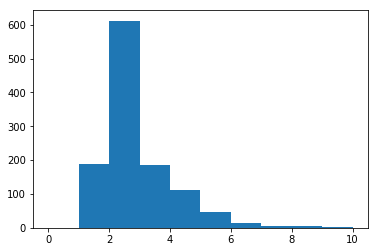

In [5]:
node_degrees = [x[1] for x in sorted(G.degree())]
plt.hist(node_degrees, bins = np.linspace(0,10,11))

(array([ 0.        ,  0.16183986,  0.52129472,  0.15843271,  0.09625213,
         0.04003407,  0.01277683,  0.00425894,  0.00425894,  0.00085179]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

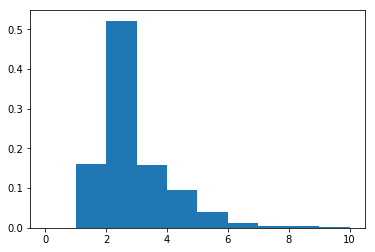

In [6]:
plt.hist(node_degrees, bins = np.linspace(0,10,11), normed=True)

##### Conclusions:
##### The graph is connected (no zero degree nodes), very few cities have a single road connected to them.
##### Roughly 50% are connected by 2 cities.
##### A few outliers have up to 10 roads

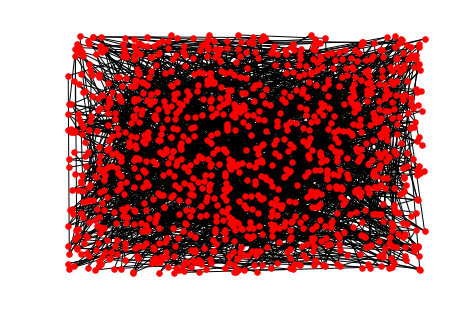

In [7]:
nx.draw_random(G,node_size=30)

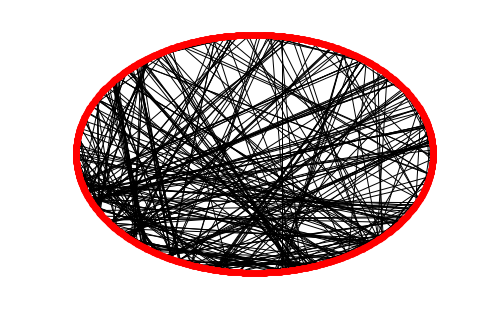

In [8]:
nx.draw_circular(G,node_size=30)

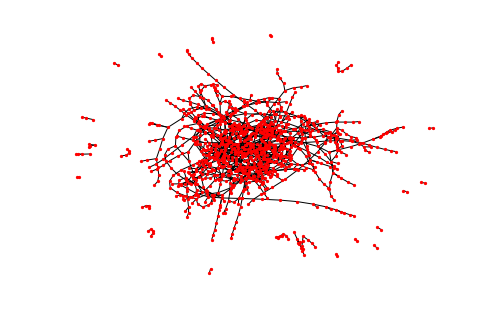

In [9]:
# This one was supposed to be more pleasant, but it turned out not to be
# It uses a technqiue called "Force directed Graph Drawing", but the result isn't particularly beautiful.
nx.draw_spring(G,node_size=5)

The above are terrible plots.
Ideally I would use the cities coordinates to plot, but I don't have them from the initial data set.